## Decision Tree Regressor Air Quality Index Prediction¶


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# -*- coding: utf-8 -*-
import os
import os.path
from requests import session
import logging
import sys
from pathlib import Path
    #project_dir =os.getcwd().resolve().parent.parent
    
raw_data_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir,'data','AQI'))
print(raw_data_path)

train_csv = os.path.join(raw_data_path, 'Real_Combine.csv')
train_csv

df=pd.read_csv(train_csv)

C:\Users\Admin\python-journey-begins\Air Quality Index Prediction\data\AQI


In [54]:
df=df.dropna()
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

### Decision Tree Regressor¶


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

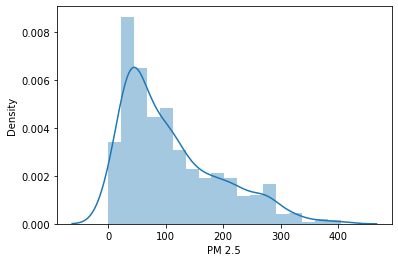

In [55]:
sns.distplot(y)


### Train Test split¶


In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


In [77]:
dtree=DecisionTreeRegressor(criterion="mse")
clf = DecisionTreeClassifier(random_state=0)


In [80]:
y_train

1068    235.333333
181     166.916667
426      80.208333
1019     57.583333
9       107.625000
           ...    
1034     30.666667
764       1.791667
836      38.250000
560     107.625000
685      48.916667
Name: PM 2.5, Length: 764, dtype: float64

In [81]:
dtree.fit(X_train,y_train)


DecisionTreeRegressor()

In [82]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))


Coefficient of determination R^2 <-- on train set: 1.0


In [83]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))


Coefficient of determination R^2 <-- on test set: 0.7119351063452641


In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,X,y,cv=5)

In [73]:
score.mean()

0.5196922758992771

## Tree Visualization¶


In [17]:

##conda install pydotplus
## conda install python-graphviz

from IPython.display import Image  
from six import StringIO

from sklearn.tree import export_graphviz
import pydotplus

In [18]:
features = list(df.columns[:-1])
features

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [19]:
os.environ['PATH']

'C:\\Users\\Admin\\anaconda3;C:\\Users\\Admin\\anaconda3\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\Library\\bin;C:\\Users\\Admin\\anaconda3\\Scripts;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0\\;C:\\WINDOWS\\System32\\OpenSSH\\;C:\\Program Files\\Git\\cmd;C:\\Program Files\\MySQL\\MySQL Shell 8.0\\bin\\;C:\\Users\\Admin\\AppData\\Local\\Microsoft\\WindowsApps'

In [20]:
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


In [21]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.94261 to fit



## Model Evaluation¶


In [22]:
prediction=dtree.predict(X_test)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

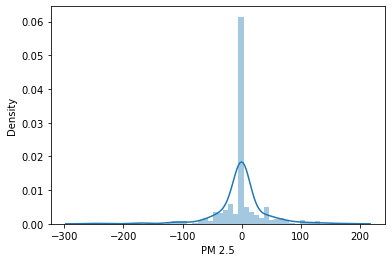

In [23]:
sns.distplot(y_test-prediction)


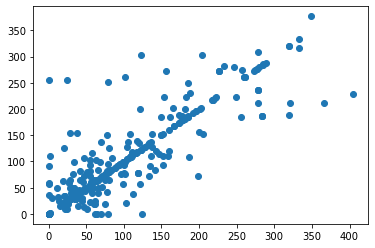

In [24]:
plt.scatter(y_test,prediction)


## Hyperparameter Tuning DEcision Tree Regressor¶


In [25]:
DecisionTreeRegressor()


DecisionTreeRegressor()

In [26]:

## Hyper Parameter Optimization

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70]
    
}

In [27]:
## Hyperparameter optimization using GridSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
random_search=GridSearchCV(dtree,param_grid=params,scoring='neg_mean_squared_error',n_jobs=-1,cv=10,verbose=3)


In [29]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [40]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 10240 candidates, totalling 102400 fits

 Time taken: 0 hours 1 minutes and 59.84 seconds.


In [41]:
random_search.best_params_


{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [42]:
random_search.best_score_


-2900.67077488796

In [48]:
random_search_predictions=random_search.predict(X_test)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

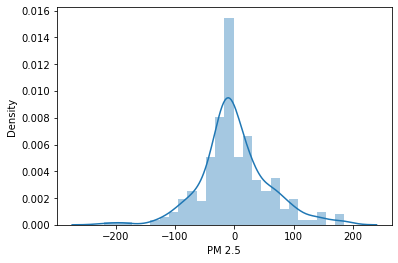

In [49]:
sns.distplot(y_test-random_search_predictions)


In [85]:
# GridSearchCV


from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, random_search_predictions))
print('MSE:', metrics.mean_squared_error(y_test, random_search_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, random_search_predictions)))

MAE: 41.38807833581143
MSE: 3302.3678598108263
RMSE: 57.466232343967235


In [86]:
# DecisionTreeRegressor

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 22.344766260548777
MSE: 1934.2235110402298
RMSE: 43.97980799230744


In [52]:
import pickle

# open a file, where you ant to store the data
file = open('decision_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(random_search, file)